In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

#Libraries for Linear Regression Model and Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import statsmodels.formula.api as smf

In [13]:
data = pd.read_csv("50_Startups.csv")

In [14]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [62]:
data = data.rename({"R&D Spend":"RD_spend","Marketing Spend":"marketing_spend"},axis=1)
data.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [58]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

## Create Dummy Variables

In [60]:
data = pd.get_dummies(data, columns=['State'])
data.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [116]:
data = data.rename({"State_New York":"State_New_York"},axis=1)
data.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [117]:
data.dtypes

RD_spend            float64
Administration      float64
marketing_spend     float64
Profit              float64
State_California      uint8
State_Florida         uint8
State_New_York        uint8
dtype: object

In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RD_spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
marketing_spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83
State_California,50.0,0.3400,0.478518,0.00,0.0000,0.000,1.0000,1.00
State_Florida,50.0,0.3200,0.471212,0.00,0.0000,0.000,1.0000,1.00
State_New_York,50.0,0.3400,0.478518,0.00,0.0000,0.000,1.0000,1.00


In [119]:
data.isna().sum()

RD_spend            0
Administration      0
marketing_spend     0
Profit              0
State_California    0
State_Florida       0
State_New_York      0
dtype: int64

# Correlation

In [120]:
data.iloc[:, 0:4].corr()

,RD_spend,Administration,marketing_spend,Profit
RD_spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [121]:
# correlation of Profit in relation with the other independent features
data.iloc[:, 0:4].corr()['Profit'].sort_values().to_frame()

,Profit
Administration,0.200717
marketing_spend,0.747766
RD_spend,0.972900
Profit,1.000000



Printing the Plot for Feature:  RD_spend
***********************************


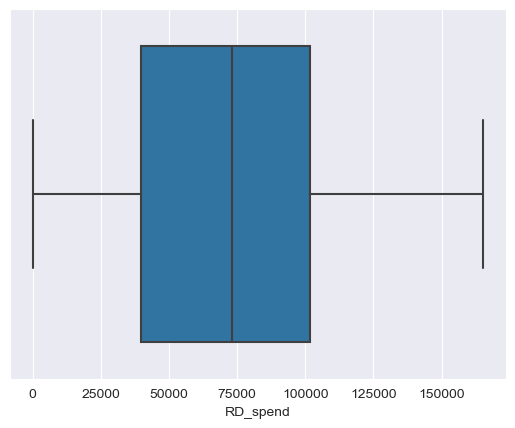


Printing the Plot for Feature:  Administration
***********************************


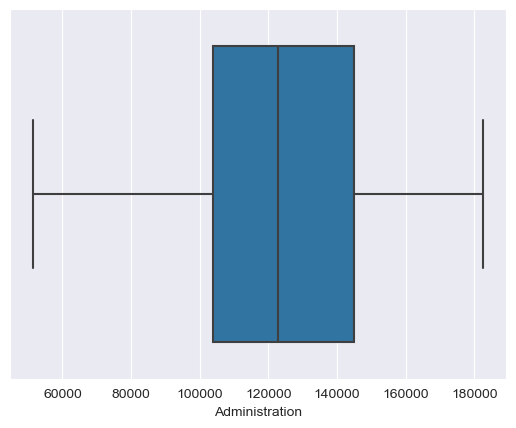


Printing the Plot for Feature:  marketing_spend
***********************************


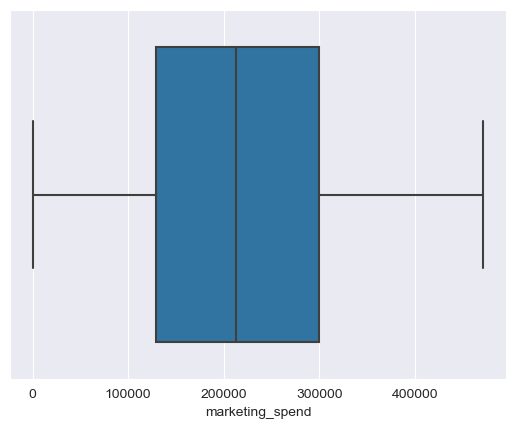


Printing the Plot for Feature:  Profit
***********************************


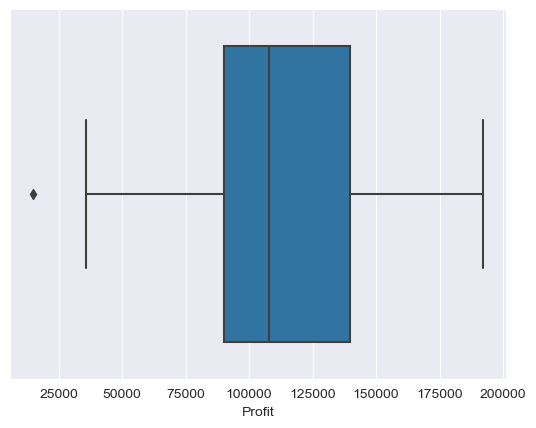

In [122]:
for i in data.columns:
    if i!='State':
        if data[i].dtype == 'int64' or data[i].dtype =='float64':
            print("\nPrinting the Plot for Feature: ", i)
            print("***********************************")
            sns.boxplot(x=i, data= data)
            plt.show()


Printing the Plot for Feature:  RD_spend
***********************************


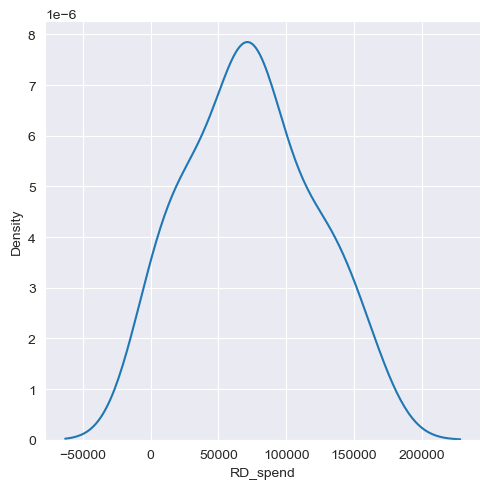


Printing the Plot for Feature:  Administration
***********************************


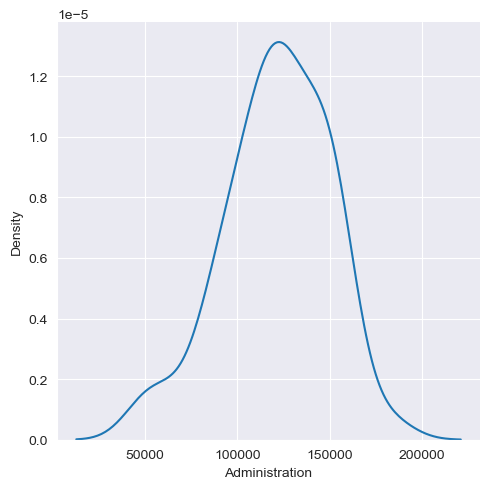


Printing the Plot for Feature:  marketing_spend
***********************************


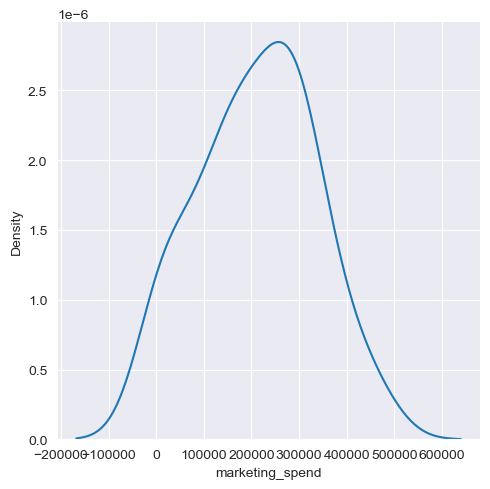


Printing the Plot for Feature:  Profit
***********************************


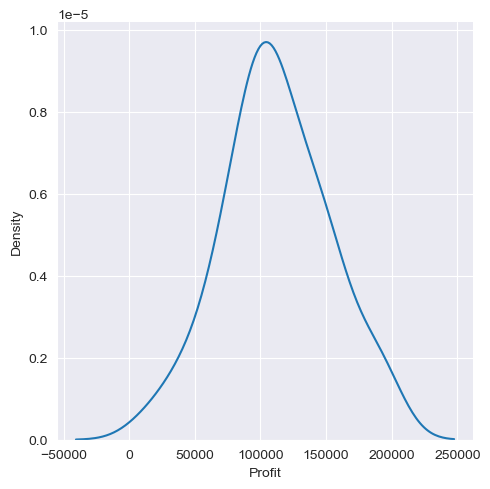

In [123]:
for i in data.columns:
    if i!='State':
        if data[i].dtype == 'int64' or data[i].dtype =='float64':
            print("\nPrinting the Plot for Feature: ", i)
            print("***********************************")
            sns.displot(data[i], kind='kde')
            plt.show()

# Visualise heatmap correlation

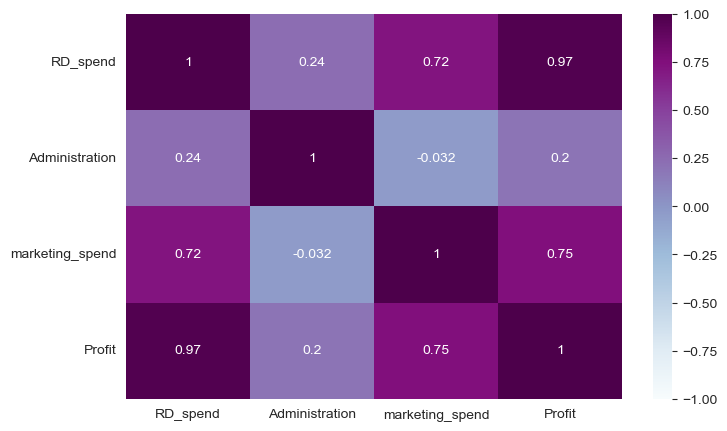

In [124]:
plt.figure(figsize=(8,5))
sns.heatmap(data.iloc[:, 0:4].corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 10});

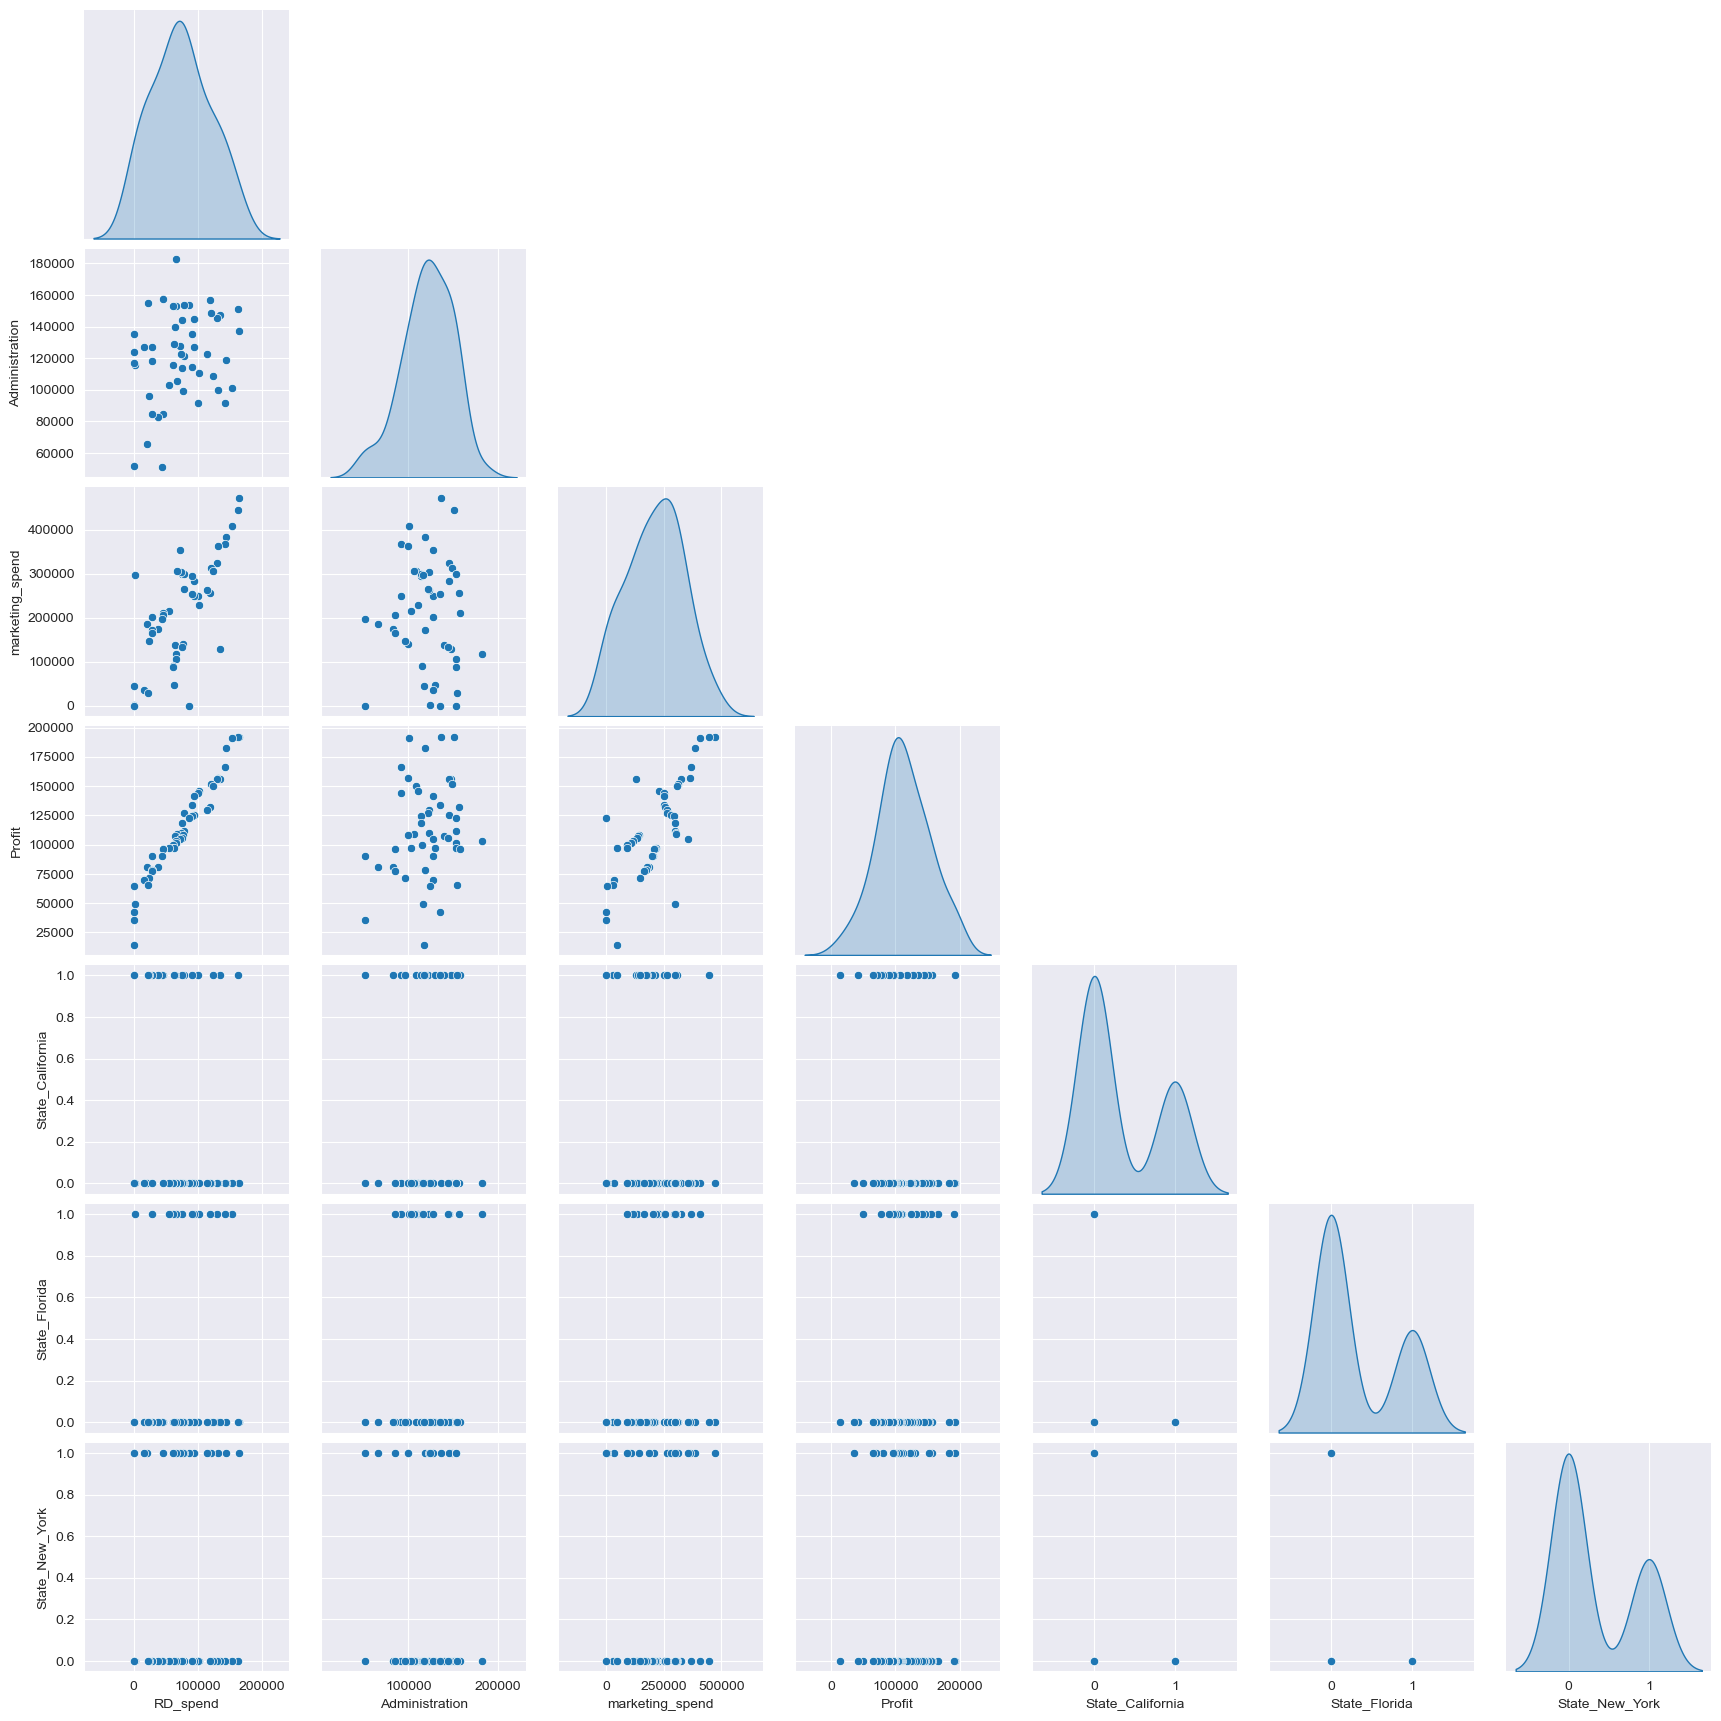

In [125]:
sns.set_style(style='darkgrid')
sns.pairplot(data,corner=True,diag_kind='kde')

#### Simple Linear Regression to start with


In [126]:
#Build model
myformula = 'Profit~RD_spend'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           3.50e-32
Time:                        13:35:46   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
myformula = 'Profit~marketing_spend'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.38e-10
Time:                        13:35:46   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
myformula = 'Profit~Administration'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 09 Nov 2023   Prob (F-statistic):              0.162
Time:                        13:35:46   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### MultiLinear Regression

In [129]:
#Build model
myformula = 'Profit~RD_spend+marketing_spend'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.16e-31
Time:                        13:35:46   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_spend            0.7966      0.041     19.266      0.000       0.713       0.880
marketing_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
#Build model
myformula = 'Profit~marketing_spend+Administration'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.50e-10
Time:                        13:35:46   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [131]:
#Build model
myformula = 'Profit~RD_spend+marketing_spend+Administration'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        13:35:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_spend            0.8057      0.045     17.846      0.000       0.715       0.897
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Split Data

In [132]:
# lets build our linear model
# independant variables
X = data.drop(['Profit'], axis=1)
# the dependent variable
y = data[['Profit']]

In [133]:
X

,RD_spend,Administration,marketing_spend,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [134]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [135]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [136]:
X_train.shape

(35, 6)

In [137]:
X_test.shape

(15, 6)

In [138]:
y_train.shape

(35, 1)

In [139]:
y_test.shape

(15, 1)

## Fit Linear Model

In [140]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [141]:
regression_model.coef_

array([[ 7.70711613e-01, -1.41653527e-02,  3.50988115e-02,
         4.21046246e+02, -5.35781864e+02,  1.14735618e+02]])

Here are the coefficients for each variable and the intercept

In [142]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for RD_spend is 0.7707116126517846
The coefficient for Administration is -0.014165352673777424
The coefficient for marketing_spend is 0.035098811509662965
The coefficient for State_California is 421.0462458292027
The coefficient for State_Florida is -535.7818635530289
The coefficient for State_New_York is 114.73561772382513


In [143]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 49051.11293050682


# The score (R^2) for in-sample and out of sample

In [144]:
regression_model.score(X_train, y_train)

0.9461536517350195

In [145]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.9529676095424044

In [146]:
findcarpred = data.copy()

In [147]:
findcarpred.head(2)

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [161]:
findcarpred['ypred'] = regression_model.predict(X)
np.set_printoptions(precision=2)
print(findcarpred['ypred'])

0     191222.252713
1     188224.088641
2     179659.739827
3     172204.164107
4     169596.587949
5     162126.998728
6     155619.442126
7     158243.814884
8     150899.968284
9     153692.797060
10    133537.597722
11    134526.698340
12    127822.742526
13    127320.665726
14    147742.728208
15    144881.648470
16    117153.529346
17    129982.168339
18    127961.460196
19    113595.933392
20    117111.692063
21    117923.691163
22    114450.682310
23    109762.455742
24    112072.215305
25    102175.506369
26    109235.427094
27    115325.098759
28    100981.627195
29    101321.430543
30     97855.695424
31     97217.645045
32     98129.200078
33     97358.743812
34     90418.228150
35     90638.086034
36     75866.340082
37     89626.436120
38     70325.437618
39     84156.447474
40     76019.131266
41     74585.496939
42     71524.601492
43     60559.086653
44     65366.432364
45     48244.891508
46     58316.958333
47     47553.789093
48     48850.652810
49     49400.563110


In [162]:
findcarpred.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York,ypred,Error
0,165349.20,136897.80,471784.10,192261.83,0,0,1,191222.252713,1039.577287
1,162597.70,151377.59,443898.53,191792.06,1,0,0,188224.088641,3567.971359
2,153441.51,101145.55,407934.54,191050.39,0,1,0,179659.739827,11390.650173
3,144372.41,118671.85,383199.62,182901.99,0,0,1,172204.164107,10697.825893
4,142107.34,91391.77,366168.42,166187.94,0,1,0,169596.587949,-3408.647949


In [163]:
findcarpred['Error'] = findcarpred['Profit']-findcarpred['ypred']

In [164]:
findcarpred.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York,ypred,Error
0,165349.20,136897.80,471784.10,192261.83,0,0,1,191222.252713,1039.577287
1,162597.70,151377.59,443898.53,191792.06,1,0,0,188224.088641,3567.971359
2,153441.51,101145.55,407934.54,191050.39,0,1,0,179659.739827,11390.650173
3,144372.41,118671.85,383199.62,182901.99,0,0,1,172204.164107,10697.825893
4,142107.34,91391.77,366168.42,166187.94,0,1,0,169596.587949,-3408.647949


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

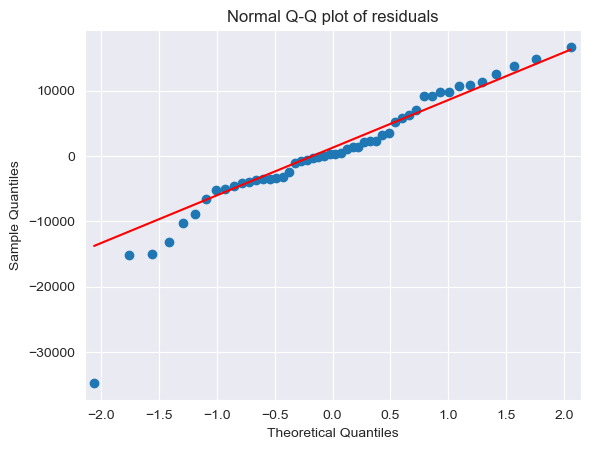

In [165]:
import statsmodels.api as sm
qqplot=sm.qqplot(findcarpred['Error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [166]:
list(np.where(findcarpred['Error']>10))

[array([ 0,  1,  2,  3,  6,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 31,
        34, 35, 36, 37, 38, 40, 41, 43, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [167]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

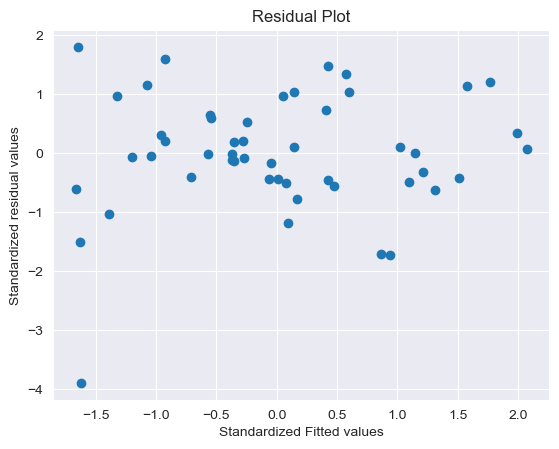

In [168]:
plt.scatter(get_standardized_values(findcarpred['ypred']),
            get_standardized_values(findcarpred['Error']))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [156]:
data.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [157]:
myformula = 'Profit~RD_spend+marketing_spend+Administration+State_California+State_Florida+State_New_York'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           1.34e-27
Time:                        13:36:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_spend             0.8060      0.046     17.369      0.000       0.712       0.900
marketing_spend      0.0270      0.017      1.574      0.123      -0.008       0.062
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.57e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model  Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [173]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

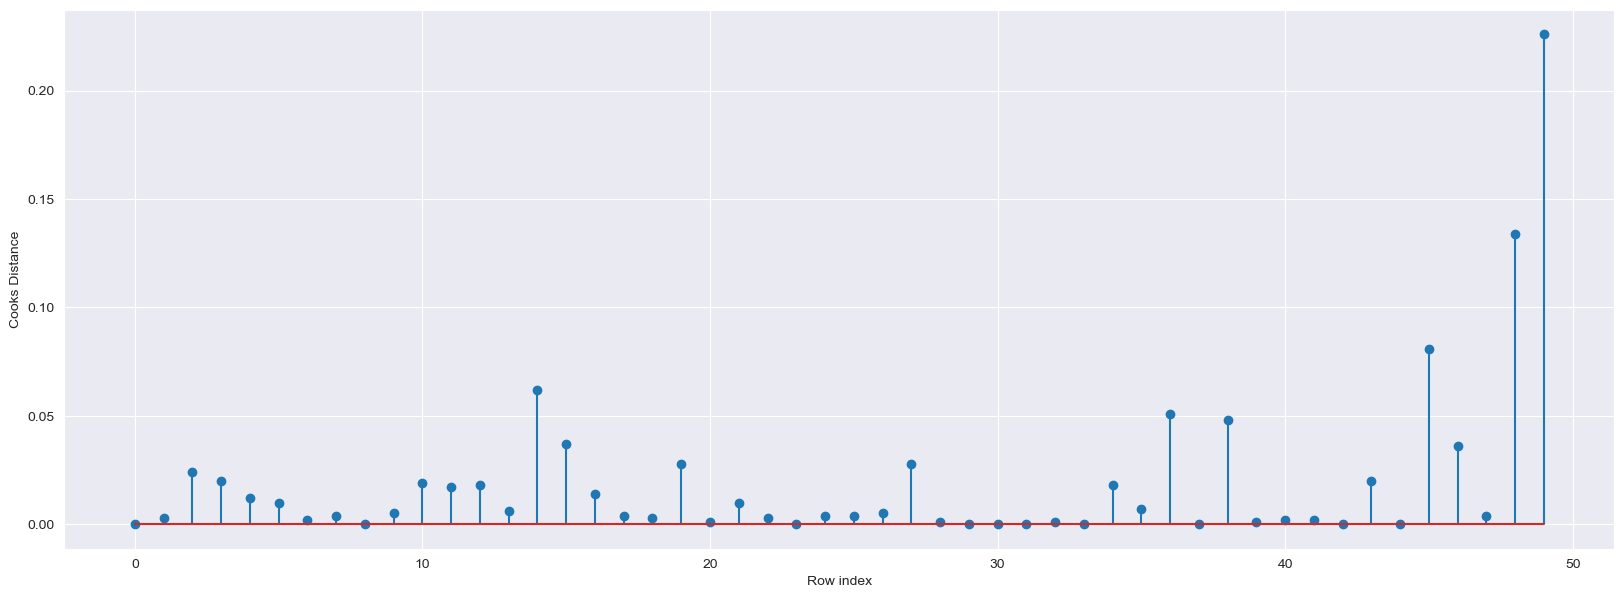

In [175]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [176]:
#index and value of influencer
(np.argmax(c),np.max(c))

(49, 0.22625094501509327)

## High Influence points

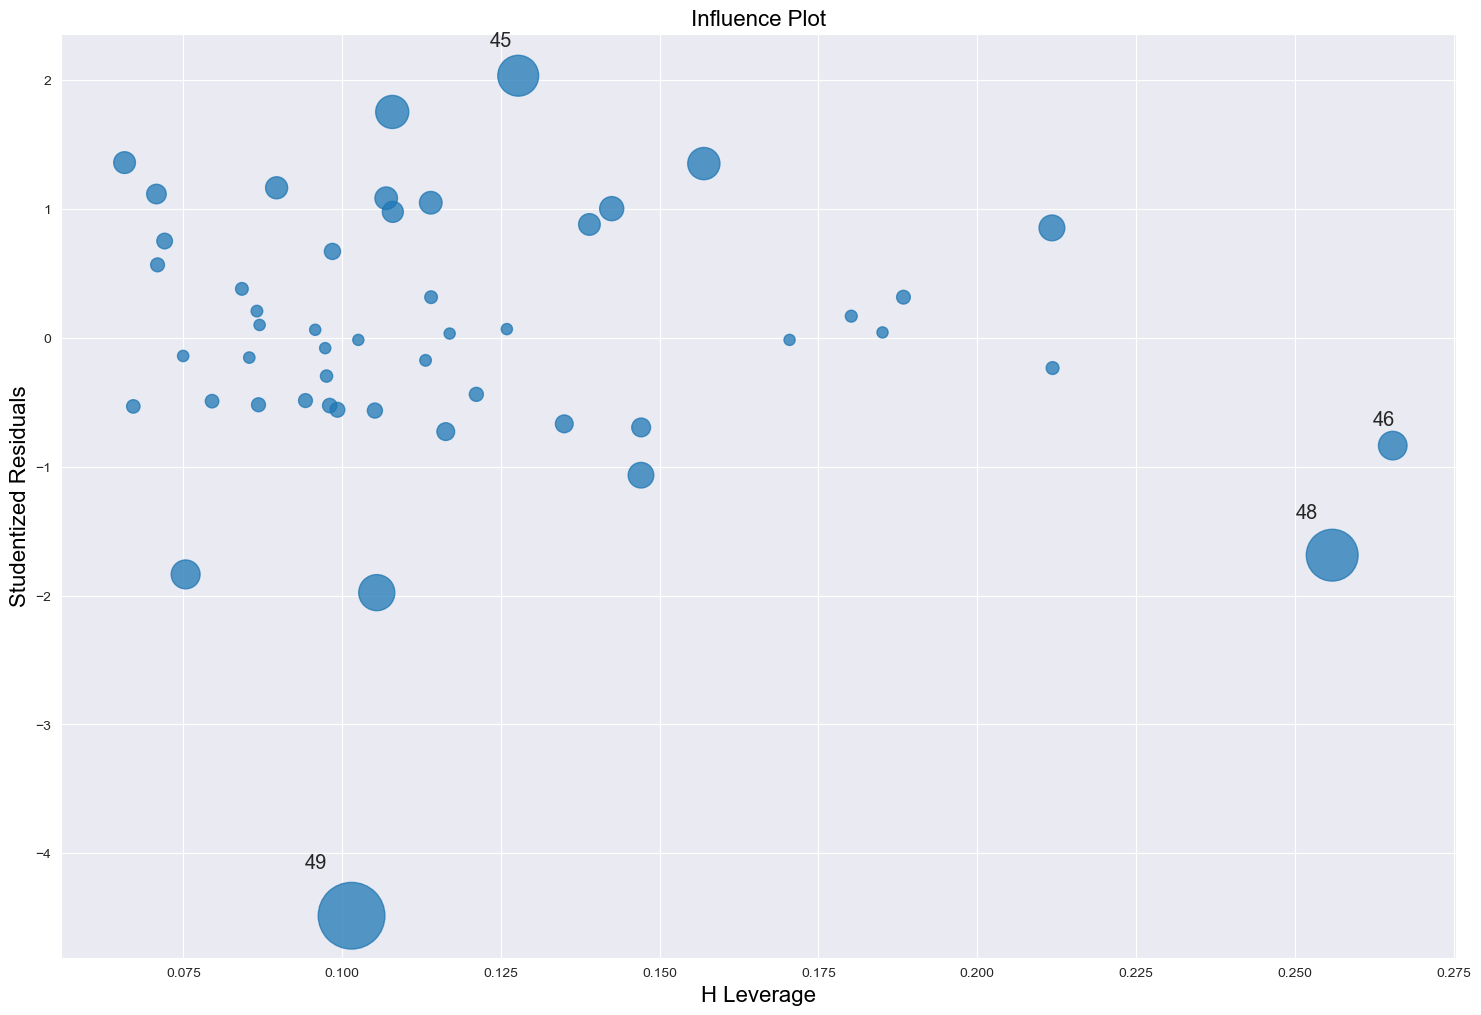

In [177]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(18,12))
influence_plot(model, ax=ax, criterion='cooks')
plt.show()

In [178]:
data.shape

(50, 7)

In [179]:
## Below is for leverage cutoff
n = data.shape[0]
k = data.shape[1]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.48


In [181]:
# obtain Cook's distance 
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n= data.shape[0]
critical_d = 4/n
print('Critical Cooks distance:', critical_d)
out_d = model_cooksd > critical_d

# output potential outliers with leverage
print(data.index[out_d], "\n", 
    model_cooksd[out_d])

Critical Cooks distance: 0.08
Int64Index([45, 48, 49], dtype='int64') 
 [0.08 0.13 0.23]


In [182]:
data[data.index.isin([ 45, 48, 49])]

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York
45,1000.23,124153.04,1903.93,64926.08,0,0,1
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [183]:
new_data =data.drop(data.index[[45, 48, 49]],axis=0).reset_index()

In [184]:
new_data.head()

,index,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [185]:
#Drop the original index
new_data = new_data.drop(['index'],axis=1)

In [186]:
new_data.head()

,RD_spend,Administration,marketing_spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [188]:
myformula = 'Profit~RD_spend+marketing_spend+Administration+State_California+State_Florida+State_New_York'
model = smf.ols(myformula,data=new_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     223.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           1.35e-28
Time:                        15:43:16   Log-Likelihood:                -481.36
No. Observations:                  47   AIC:                             974.7
Df Residuals:                      41   BIC:                             985.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.278e+04   4474.528      9.561      0.000    3.37e+04    5.18e+04
RD_spend             0.7961      0.036     21.942      0.000       0.723       0.869
marketing_spend      0.0213      0.014      1.553      0.128      -0.006       0.049
Administration      -0.0612      0.044     -1.404      0.168      -0.149       0.027
State_California  1.534e+04   1971.111      7.783      0.000    1.14e+04    1.93e+04
State_Florida     1.391e+04   2192.475      6.345      0.000    9484.039    1.83e+04
State_New_York    1.353e+04   2226.339      6.077      0.000    9032.304     1.8e+04
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.230
Skew:                           0.060   Prob(JB):                        0.891
Kurtosis:                       2.679   Cond. No.                     2.81e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.91e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""